In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from itertools import repeat
df = pd.read_csv("CombinedSequences_ppr.csv")

In [2]:
seq = df['Sequence'].to_numpy()

def kmerise(line,k):  # String and k are inputs
    kmerised_array = []; # Final kmerised list
    for i in line:
        temp = []
        for j in range(0,len(i),k): 
            temp.append(i[j:j+k]) #append substring in each iter 
        kmerised_array.append(temp)
    
    return kmerised_array

In [3]:
df['AccessionID'] = pd.factorize(df['AccessionID'])[0]
df.head()

,AccessionID,Sequence
0,0,ATGAGAGTTCAAAGACCACCCACTCTCTTGTTAGTGTTCTCACTCT...
1,0,ATGATACACTCAGTGTTTCTACTGATGTTCTTGTTAACACCTACAG...
2,0,TATGCCTAACATGTGTAGGATTTTCGCGTCTCTGATTTTGGCACGC...
3,0,TATGCCTAACATGTGTAGGATTTTTGCATCTCTGATTTTGGCACGC...
4,0,TATGCCTAACATGTGTAGGATTTTCGCGTCTCTGATTTTGGCACGC...


In [4]:
df.tail()

,AccessionID,Sequence
2519,2,GACTAAAGATAAAAATTATATACGTATAATTTTTGTCTCTCTAGCT...
2520,2,GACAAAGGTGAAAATTAATATATATATATTAATTTTACTCCTCCTC...
2521,2,GTCATTTGGTAAAATATAATATATATTTTATCACTCTAGCTTCGCT...
2522,2,GACAAAGCTCAAAAATATATATATATATTTTTGTTGCTCCTAGCTT...
2523,2,GACTAAAGATAAAAATTATAGCATTAGTCTATAATTTTATCTCCCT...


In [5]:
k = 15
kmers_list =  kmerise(seq,k)

In [6]:
baseDict = {'A': 1, 'C': 2, 'G': 3, 'T': 4, 'R': 5, 'Y': 6, 'S': 7, 'W': 8, 'K': 9, 'M': 10, 'B': 11, 'D': 12, 'H': 13, 'V': 14,'N': 15}

In [7]:
def vectorizedList(line):  # String and k are inputs
    vectorized_array = []; # Final vectorised list
    for i in line:
        temp = ""
        for j in range(len(i)):
            temp += str(baseDict[i[j]])
        vectorized_array.append(int(temp))
    
    return vectorized_array

In [8]:
Vec = []
len_vec = []
for i in range(len(kmers_list)):
    Vec.append(vectorizedList(kmers_list[i]))
    len_vec.append(len(kmers_list[i]))
#Vec

In [9]:
f = [[float(i) for i in j] for j in Vec]
Vec = [[i / sum(j) for i in j] for j in f]

In [10]:
def padding(seq, len_vec):
    anotherseq = seq.copy()
    max_kmerlen = max(len_vec)
    for i in anotherseq:
        diff = max_kmerlen - len(i)
        i.extend(repeat(0, diff))
    
    return anotherseq    

In [11]:
pad = padding(Vec, len_vec)

In [12]:
from keras.layers import Conv2D, Input, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_score, recall_score, f1_score
import keras

In [13]:
X = np.asarray(pad)#.astype(np.float32)
y = df['AccessionID'].to_numpy()#.astype(np.float32)

In [14]:
X.shape

(2524, 2118)

In [15]:
data_shape = [353,6]
X = X.reshape(2524,data_shape[0],data_shape[1])
x_train, x_test, y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [16]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

In [17]:
x_train = x_train.reshape(x_train.shape[0], data_shape[0],data_shape[1], 1) 
x_test = x_test.reshape(x_test.shape[0], data_shape[0],data_shape[1], 1) 

In [18]:
fields = len(np.unique(df['AccessionID']))
#For training data
y_train = np.uint8(keras.utils.to_categorical(y_train, num_classes = fields))

#For test data
y_test = np.uint8(keras.utils.to_categorical(Y_test, num_classes = fields))

In [19]:
print(x_train.shape)
print(x_test.shape)

(1691, 353, 6, 1)
(833, 353, 6, 1)


In [20]:
print(y_train.shape)
print(y_test.shape)

(1691, 3)
(833, 3)


In [21]:
from keras.utils.np_utils import to_categorical
from keras.models import Model ,Sequential
from sklearn.model_selection import StratifiedKFold

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(data_shape[0],data_shape[1],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss = "mean_squared_error", metrics = ['accuracy']) 
model.fit(x_train, y_train, epochs = 32)

Epoch 1/32
53/53 [==============================] - 4s 53ms/step - loss: 0.1721 - accuracy: 0.6244
Epoch 2/32
53/53 [==============================] - 3s 52ms/step - loss: 0.1305 - accuracy: 0.6946
Epoch 3/32
53/53 [==============================] - 3s 51ms/step - loss: 0.1254 - accuracy: 0.7220
Epoch 4/32
53/53 [==============================] - 3s 49ms/step - loss: 0.1208 - accuracy: 0.7502
Epoch 5/32
53/53 [==============================] - 3s 50ms/step - loss: 0.1032 - accuracy: 0.7973
Epoch 6/32
53/53 [==============================] - 3s 51ms/step - loss: 0.0895 - accuracy: 0.8366
Epoch 7/32
53/53 [==============================] - 3s 52ms/step - loss: 0.0735 - accuracy: 0.8560
Epoch 8/32
53/53 [==============================] - 3s 50ms/step - loss: 0.0672 - accuracy: 0.8656
Epoch 9/32
53/53 [==============================] - 3s 50ms/step - loss: 0.0641 - accuracy: 0.8880
Epoch 10/32
53/53 [==============================] - 3s 50ms/step - loss: 0.0615 - accuracy: 0.8851
Epoch 11/

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 349, 2, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 1, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5568)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              5702656   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 5,769,283
Trainable params: 5,769,283
Non-trainable params: 0
______________________________________________

In [25]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("\nFinal Loss = ",loss)

53/53 [==============================] - 1s 8ms/step - loss: 0.0199 - accuracy: 0.9669
Training Accuracy: 0.9669
27/27 [==============================] - 0s 8ms/step - loss: 0.0477 - accuracy: 0.9172
Testing Accuracy:  0.9172

Final Loss =  0.04770102724432945


#### 10 fold Cross Validation for relu architecture 

In [26]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
cvscores = []
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(data_shape[0],data_shape[1],1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = "accuracy")
    model.fit(x_train, y_train, epochs = 32,verbose = 0)
    scores = model.evaluate(x_test, y_test, verbose = 0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

accuracy: 90.64%
accuracy: 91.24%
accuracy: 91.12%
accuracy: 91.00%
accuracy: 90.40%
accuracy: 89.68%
accuracy: 91.36%
accuracy: 90.76%
accuracy: 90.40%
accuracy: 90.40%


In [27]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

90.70% (+/- 0.48%)


In [28]:
y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

In [29]:
conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
conf_matrix

array([[225.,  23.,   0.],
       [ 57., 520.,   0.],
       [  0.,   0.,   8.]])

In [30]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)

Precision:  0.9361570786977507
Recall:  0.9185050220080195
F1-score:  0.9258760107816711


In [31]:
#roc auc score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_curve, auc
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

0.9231571757559649

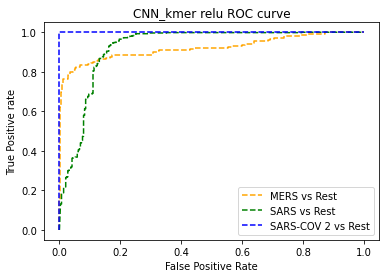

In [32]:
# roc curve for classes
fpr = {}
tpr = {}
roc_auc ={}

for i in range(fields):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('CNN_kmer relu ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Sigmoid Activation

In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='sigmoid', input_shape=(data_shape[0],data_shape[1],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [34]:
model.compile(optimizer='adagrad', loss = "categorical_crossentropy", metrics = ['accuracy']) 
model.fit(x_train, y_train, epochs = 16)

Epoch 1/16
53/53 [==============================] - 3s 50ms/step - loss: 0.8466 - accuracy: 0.6515
Epoch 2/16
53/53 [==============================] - 3s 49ms/step - loss: 0.7109 - accuracy: 0.6865
Epoch 3/16
53/53 [==============================] - 3s 48ms/step - loss: 0.6994 - accuracy: 0.6803
Epoch 4/16
53/53 [==============================] - 3s 48ms/step - loss: 0.6975 - accuracy: 0.6614
Epoch 5/16
53/53 [==============================] - 3s 48ms/step - loss: 0.6835 - accuracy: 0.6760
Epoch 6/16
53/53 [==============================] - 3s 48ms/step - loss: 0.6530 - accuracy: 0.7018
Epoch 7/16
53/53 [==============================] - 3s 52ms/step - loss: 0.6794 - accuracy: 0.6792
Epoch 8/16
53/53 [==============================] - 3s 50ms/step - loss: 0.6700 - accuracy: 0.6853
Epoch 9/16
53/53 [==============================] - 3s 48ms/step - loss: 0.6619 - accuracy: 0.6968
Epoch 10/16
53/53 [==============================] - 3s 48ms/step - loss: 0.6735 - accuracy: 0.6838
Epoch 11/

In [35]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("\nFinal Loss = ",loss)

53/53 [==============================] - 1s 9ms/step - loss: 0.6805 - accuracy: 0.6789
Training Accuracy: 0.6789
27/27 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.6519
Testing Accuracy:  0.6519

Final Loss =  0.6926966905593872


In [36]:
y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

In [37]:
conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
conf_matrix

array([[  0.,   0.,   0.],
       [282., 543.,   8.],
       [  0.,   0.,   0.]])

In [38]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)


Precision:  0.21728691476590636
Recall:  0.3333333333333333
F1-score:  0.26308139534883723


C:\Users\ARRUN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


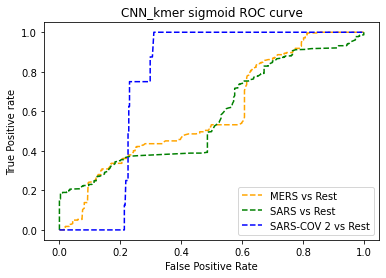

In [39]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')
# roc curve for classes
fpr = {}
tpr = {}
roc_auc ={}

for i in range(fields):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('CNN_kmer sigmoid ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### tanh Activation

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='tanh', input_shape=(data_shape[0],data_shape[1],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(3, activation='softmax'))

In [41]:
model.compile(optimizer='adam', loss = "mean_squared_error", metrics = ['accuracy']) 
model.fit(x_train, y_train, epochs = 32)

Epoch 1/32
53/53 [==============================] - 3s 52ms/step - loss: 0.1604 - accuracy: 0.6518
Epoch 2/32
53/53 [==============================] - 3s 53ms/step - loss: 0.1313 - accuracy: 0.7218
Epoch 3/32
53/53 [==============================] - 3s 55ms/step - loss: 0.1104 - accuracy: 0.7752
Epoch 4/32
53/53 [==============================] - 3s 53ms/step - loss: 0.0980 - accuracy: 0.7965
Epoch 5/32
53/53 [==============================] - 3s 55ms/step - loss: 0.0804 - accuracy: 0.8361
Epoch 6/32
53/53 [==============================] - 3s 53ms/step - loss: 0.0618 - accuracy: 0.8799
Epoch 7/32
53/53 [==============================] - 3s 53ms/step - loss: 0.0623 - accuracy: 0.8759
Epoch 8/32
53/53 [==============================] - 3s 54ms/step - loss: 0.0509 - accuracy: 0.9032
Epoch 9/32
53/53 [==============================] - 3s 54ms/step - loss: 0.0538 - accuracy: 0.8996
Epoch 10/32
53/53 [==============================] - 3s 52ms/step - loss: 0.0423 - accuracy: 0.9244
Epoch 11/

In [42]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("\nFinal Loss = ",loss)

53/53 [==============================] - 1s 9ms/step - loss: 0.0109 - accuracy: 0.9829
Training Accuracy: 0.9829
27/27 [==============================] - 0s 9ms/step - loss: 0.0441 - accuracy: 0.9220
Testing Accuracy:  0.9220

Final Loss =  0.04413331672549248


In [43]:
y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

In [44]:
conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
conf_matrix

array([[239.,  22.,   0.],
       [ 43., 521.,   0.],
       [  0.,   0.,   8.]])

In [45]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)


Precision:  0.9464892258362544
Recall:  0.9356673589070438
F1-score:  0.9405258018203263


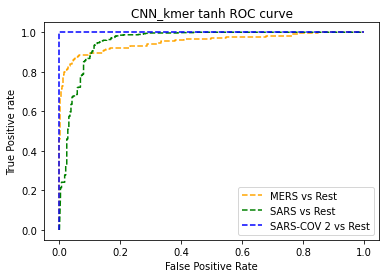

In [46]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')
# roc curve for classes
fpr = {}
tpr = {}
roc_auc ={}

for i in range(fields):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('CNN_kmer tanh ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### elu activation

In [47]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='elu', input_shape=(data_shape[0],data_shape[1],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(3, activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss = "mean_squared_error", metrics = ['accuracy']) 
model.fit(x_train, y_train, epochs = 32)

Epoch 1/32
53/53 [==============================] - 3s 53ms/step - loss: 0.1602 - accuracy: 0.6520
Epoch 2/32
53/53 [==============================] - 3s 53ms/step - loss: 0.1251 - accuracy: 0.7168
Epoch 3/32
53/53 [==============================] - 3s 54ms/step - loss: 0.1072 - accuracy: 0.7887
Epoch 4/32
53/53 [==============================] - 3s 54ms/step - loss: 0.1076 - accuracy: 0.7737
Epoch 5/32
53/53 [==============================] - 3s 53ms/step - loss: 0.0843 - accuracy: 0.8379
Epoch 6/32
53/53 [==============================] - 3s 53ms/step - loss: 0.0667 - accuracy: 0.8688
Epoch 7/32
53/53 [==============================] - 3s 53ms/step - loss: 0.0561 - accuracy: 0.9037
Epoch 8/32
53/53 [==============================] - 3s 53ms/step - loss: 0.0543 - accuracy: 0.8956
Epoch 9/32
53/53 [==============================] - 3s 56ms/step - loss: 0.0467 - accuracy: 0.9090
Epoch 10/32
53/53 [==============================] - 3s 54ms/step - loss: 0.0549 - accuracy: 0.8997
Epoch 11/

In [49]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("\nFinal Loss = ",loss)

53/53 [==============================] - 1s 9ms/step - loss: 0.2141 - accuracy: 0.6789
Training Accuracy: 0.6789
27/27 [==============================] - 0s 8ms/step - loss: 0.2321 - accuracy: 0.6519
Testing Accuracy:  0.6519

Final Loss =  0.23209282755851746


In [50]:
y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

In [51]:
conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
conf_matrix

array([[  0.,   0.,   0.],
       [282., 543.,   8.],
       [  0.,   0.,   0.]])

In [52]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)


Precision:  0.21728691476590636
Recall:  0.3333333333333333
F1-score:  0.26308139534883723


C:\Users\ARRUN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


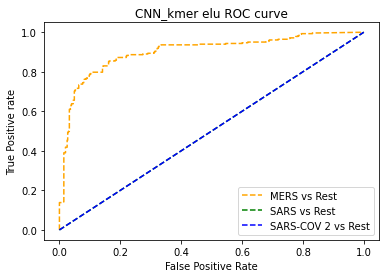

In [53]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')
# roc curve for classes
fpr = {}
tpr = {}
roc_auc ={}

for i in range(fields):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('CNN_kmer elu ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### selu Activation

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='selu', input_shape=(data_shape[0],data_shape[1],1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='selu'))
model.add(Dense(64, activation='selu'))
model.add(Dense(3, activation='softmax'))

In [55]:
model.compile(optimizer='adam', loss = "mean_squared_error", metrics = ['accuracy']) 
model.fit(x_train, y_train, epochs = 32)

Epoch 1/32
53/53 [==============================] - 3s 55ms/step - loss: 0.1593 - accuracy: 0.6875
Epoch 2/32
53/53 [==============================] - 3s 54ms/step - loss: 0.1208 - accuracy: 0.7538
Epoch 3/32
53/53 [==============================] - 3s 58ms/step - loss: 0.0845 - accuracy: 0.8254
Epoch 4/32
53/53 [==============================] - 3s 57ms/step - loss: 0.0665 - accuracy: 0.8645
Epoch 5/32
53/53 [==============================] - 3s 57ms/step - loss: 0.0630 - accuracy: 0.8766
Epoch 6/32
53/53 [==============================] - 3s 57ms/step - loss: 0.0509 - accuracy: 0.9076
Epoch 7/32
53/53 [==============================] - 3s 58ms/step - loss: 0.0615 - accuracy: 0.8815
Epoch 8/32
53/53 [==============================] - 3s 55ms/step - loss: 0.0445 - accuracy: 0.9166
Epoch 9/32
53/53 [==============================] - 3s 54ms/step - loss: 0.0398 - accuracy: 0.9266
Epoch 10/32
53/53 [==============================] - 3s 52ms/step - loss: 0.0372 - accuracy: 0.9318
Epoch 11/

In [56]:
#Printing the loss and accuracy of training and testing sets
loss, accuracy = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("\nFinal Loss = ",loss)

53/53 [==============================] - 1s 8ms/step - loss: 0.0107 - accuracy: 0.9840
Training Accuracy: 0.9840
27/27 [==============================] - 0s 8ms/step - loss: 0.0454 - accuracy: 0.9172
Testing Accuracy:  0.9172

Final Loss =  0.04543384164571762


In [57]:
y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(y_pred,axis=1)
y_act = np.argmax(y_test,axis=1)

In [58]:
conf_matrix = np.zeros((3,3))
for i in range(len(y_act)):
    conf_matrix[Y_pred_classes[i]][y_act[i]] += 1
conf_matrix

array([[230.,  17.,   0.],
       [ 52., 526.,   0.],
       [  0.,   0.,   8.]])

In [59]:
precision = precision_score(Y_test, Y_pred_classes, average='macro')
recall = recall_score(Y_test, Y_pred_classes, average='macro')
f1score = f1_score(Y_test, Y_pred_classes, average='macro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1score)


Precision:  0.9470695637149835
Recall:  0.9280984287449551
F1-score:  0.9360043439475624


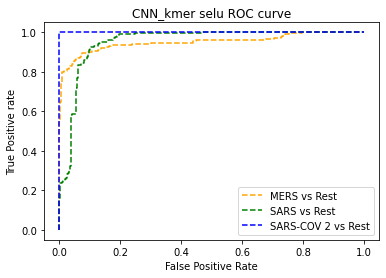

In [60]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')
# roc curve for classes
fpr = {}
tpr = {}
roc_auc ={}

for i in range(fields):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='MERS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='SARS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='SARS-COV 2 vs Rest')
plt.title('CNN_kmer selu ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()